# Music Recommender Data Cleaning & EDA

### Import Libraries, Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
music_df = pd.read_csv('./data/clean/music_df.csv')

In [3]:
music_df.shape

(18379, 8)

In [4]:
music_df.head(1)

,reviewid,score,title,artist,url,content,genre,year
0,22703,9.3,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,"“Trip-hop” eventually became a ’90s punchline,...",electronic,1998.0


### Data Description

In [5]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviewid  18379 non-null  int64  
 1   score     18379 non-null  float64
 2   title     18377 non-null  object 
 3   artist    18377 non-null  object 
 4   url       18379 non-null  object 
 5   content   18378 non-null  object 
 6   genre     16016 non-null  object 
 7   year      17973 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.1+ MB


In [6]:
music_df.isnull().sum()

reviewid       0
score          0
title          2
artist         2
url            0
content        1
genre       2363
year         406
dtype: int64

In [7]:
#drop any null values - only dropping less than 20 out of the large amount of data
music_df.dropna(subset=['artist'], inplace=True)
music_df.dropna(subset=['title'], inplace=True)
music_df.dropna(subset=['content'], inplace=True)

### Scores

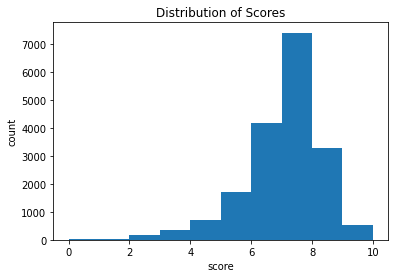

In [8]:
plt.figure(figsize=(6, 4))
plt.hist(music_df['score'])
plt.title('Distribution of Scores')
plt.xlabel('score')
plt.ylabel('count');
#fairly normal, skewed to the left

### Genres

In [9]:
music_df['genre'].value_counts()

rock            9430
electronic      1992
rap             1488
pop/r&b         1087
folk/country     574
experimental     562
metal            357
jazz             341
global           183
Name: genre, dtype: int64

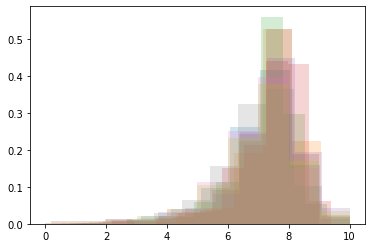

In [10]:
genres = music_df.groupby('genre')['score']
for genre in genres:
    plt.hist(genre[1], bins=10, alpha=0.2, density=True)
#no one genre stands out for amount of ratings

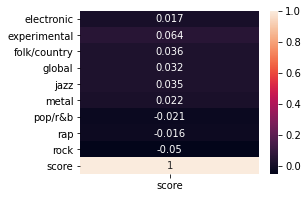

In [11]:
genre_df = pd.get_dummies(music_df['genre'])
genre_df['score'] = music_df['score']

plt.figure(figsize = (4, 3))
sns.heatmap(genre_df.corr()[["score"]], annot=True);
#not much correlation between genres and scores

### Reviews (content)

In [12]:
# Review length
music_df['review_length'] = [len(i) for i in music_df['content']]
music_df['review_word_count'] = music_df['content'].str.split().apply(len)

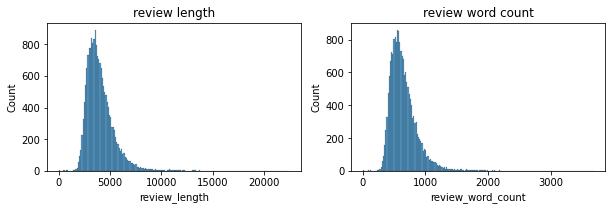

In [13]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(2, 2, 1)
sns.histplot(music_df['review_length'], ax=ax)
plt.title('review length')

ax = fig.add_subplot(2, 2, 2)
sns.histplot(music_df['review_word_count'], ax=ax)
plt.title('review word count');

In [14]:
#both review length and review word count are fairly normal, skewed to the right

In [15]:
music_df['review_word_count'].nlargest(3)

503     3688
104     3576
5971    3021
Name: review_word_count, dtype: int64

In [16]:
music_df.loc[music_df['review_word_count'] > 3000][:2]

,reviewid,score,title,artist,url,content,genre,year,review_length,review_word_count
104,22561,9.5,death certificate,ice cube,http://pitchfork.com/reviews/albums/22561-deat...,Ice Cube left N.W.A. in late 1989 over a royal...,rap,1991.0,22419,3576
503,22044,8.6,dangerous,michael jackson,http://pitchfork.com/reviews/albums/22044-dang...,"On the night of November 14, 1991, 500 million...",pop/r&b,1991.0,22171,3688


### Word Counts, Bigrams, Trigrams

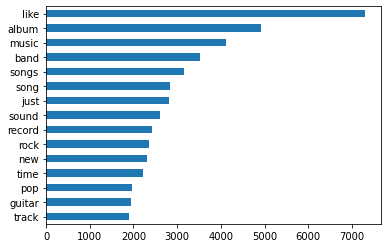

In [17]:
#most common words
cvect = CountVectorizer(stop_words='english')
words = music_df['content'].sample(n=2000)
words_vect = cvect.fit_transform(words)
words_df = pd.DataFrame(words_vect.toarray(), columns=cvect.get_feature_names())
words_df.sum().sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis();

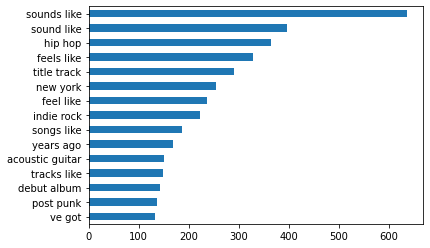

In [18]:
#most common bigrams
#note this is from sample of data due to large vector size
cvect_bigrams = CountVectorizer(ngram_range = (2, 2), stop_words='english')
words = music_df['content'].sample(n=2000)
words_vect_bigrams = cvect_bigrams.fit_transform(words)
words_vect_bigrams_df = pd.DataFrame(words_vect_bigrams.toarray(), columns=cvect_bigrams.get_feature_names())
words_vect_bigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis();

In [19]:
#most common trigrams
#note this is from sample of data due to large vector size
cvect_trigrams = CountVectorizer(ngram_range = (3, 3), stop_words='english')
words = music_df['content'].sample(n=2000)
words_vect_trigrams = cvect_trigrams.fit_transform(words)
words_vect_trigrams_df = pd.DataFrame(words_vect_trigrams.toarray(), columns=cvect_trigrams.get_feature_names())
words_vect_trigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis();

MemoryError: Unable to allocate 10.4 GiB for an array with shape (2000, 699916) and data type int64